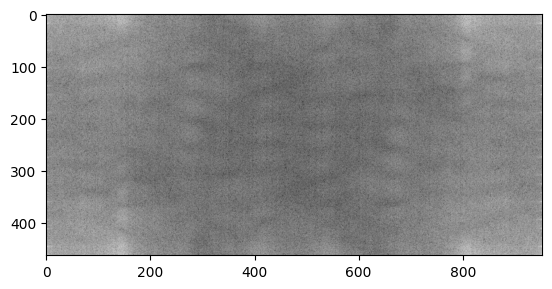

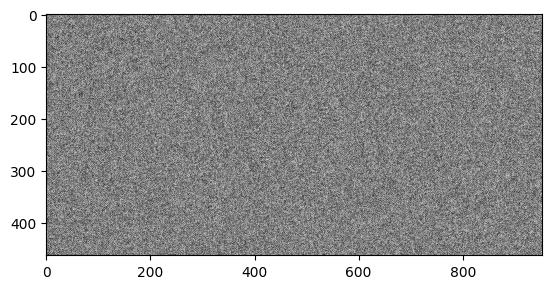

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
from PIL import Image


galia_img = np.asarray(Image.open("galia.png").convert("L"))*(-1) + 255
galia = fft.fft2(galia_img)

# plot absolutes
absolute_matrix = np.log10(np.abs(galia))  # log scale, since without it the image will be entirely black
plt.imshow(absolute_matrix, cmap="gray")
plt.show()

# plot phases
phase_matrix = np.angle(galia)
plt.imshow(phase_matrix, cmap="gray")
plt.show()


letter = np.asarray(Image.open("galia_e.png").convert("L"))*(-1) + 255
letter_x = letter.shape[0]
letter_y = letter.shape[1]

zeros = np.zeros(galia.shape)
# letter = fft.fft2(rot90(letter, 2), s=galia.shape)
letter = letter[::-1, ::-1]
zeros[:letter.shape[0], :letter.shape[1]] = letter
letter = zeros
letter = fft.fft2(letter)

absolute_correlations = abs(fft.ifft2(galia * letter))
max_correlation = np.amax(absolute_correlations)

new_img = np.array(Image.open("galia.png").convert("RGB"))

for i in range(absolute_correlations.shape[0]):
    for j in range(absolute_correlations.shape[1]):
        if absolute_correlations[i, j] >= 0.9 * max_correlation:
            for k in range(letter_x):
                new_img[i-k, j] = (255, 0, 0)
                new_img[i-k, j-letter_y] = (255, 0, 0)
            for l in range(letter_y):
                new_img[i, j-l] = (255, 0, 0)
                new_img[i-letter_x, j-l] = (255, 0, 0)


result = Image.fromarray(new_img)
result.save("new_galia.jpg")